In [8]:
import pandas as pd

# Loading the dataset
df = pd.read_csv("/home/nashtech/Downloads/train.csv")

# Preview of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Shape and structure
print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
df.info()

# Summary statistics
df.describe(include='all')

# Check for the missing values
df.isnull().sum()


Shape of dataset: (891, 12)

Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Drop irrelevant columns (keeping 'Name')
df = df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

# Fill missing Age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Convert 'Sex' and 'Embarked' to numeric using get dummies
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

df.head()


,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,True,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,False,False,False
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,False,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,False,False,True
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,True,False,True


In [11]:
# Survival rate by gender
print(df.groupby('Sex_male')['Survived'].mean())

# Survival rate by class
print(df.groupby('Pclass')['Survived'].mean())

# Age distribution for survivors vs non-survivors
print(df.groupby('Survived')['Age'].mean())


Sex_male
False    0.742038
True     0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64


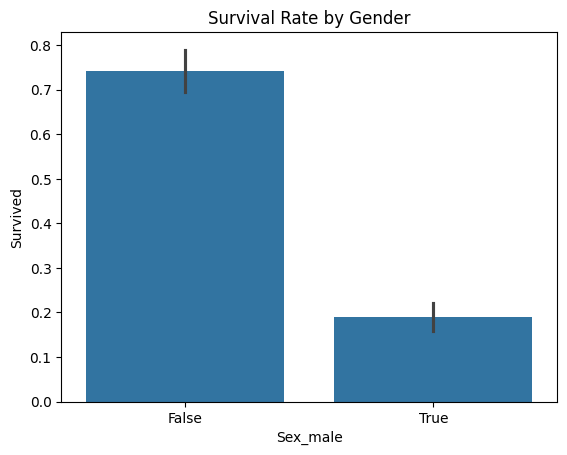

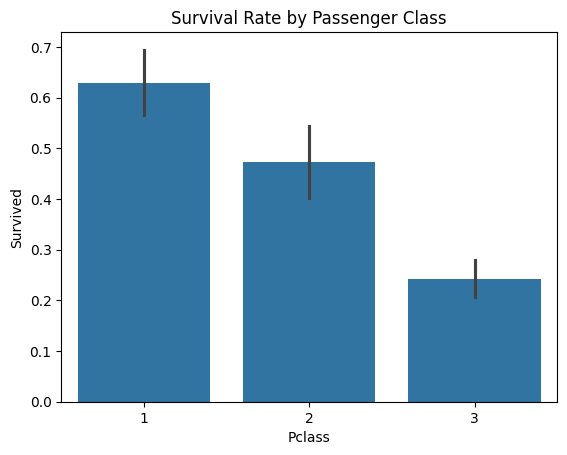

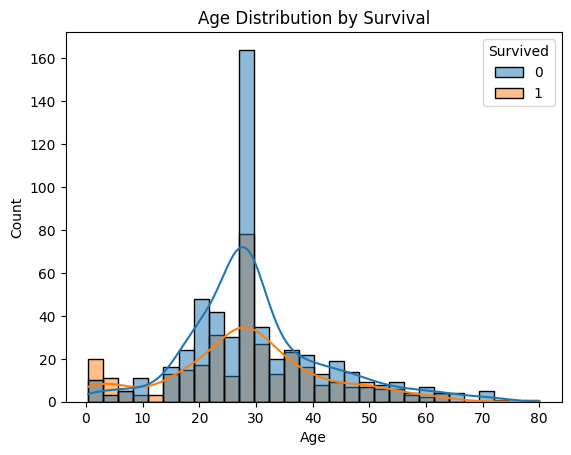

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Survival by gender
sns.barplot(x='Sex_male', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

# Survival by passenger class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

# Age distribution
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title("Age Distribution by Survival")
plt.show()


### Summary of Findings:

- **Gender:** Females had a much higher survival rate compared to males.
- **Passenger Class:** First-class passengers were more likely to survive.
- **Age:** Younger passengers had slightly higher survival chances, though not significantly.
- **Embarked Port:** Most passengers boarded from port 'S'; survival rate was highest from port 'C'.

These patterns reveal clear socio-economic and demographic factors influencing survival on the Titanic.
